In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time 

## OpenCv's Interpolation:




## OpenCV's Video Writer:
Steps to use video Writer:
1. Create VideoWriter Object
2. Write Frame to VideoWriter
```python
cv.VideoWriter(filename, fourcc, fps, frameSize)
```
**Parameters:**

1. **filename:** Output video file
2. **fourcc:** 4-character code of codec used to compress the frames
3. **fps:** framerate of videostream
4. **framesize:** Height and width of frame

**Write Frame** (Frames have to share same size) 
``` python
for frame in range(0,len(list_of_frames)):
    frame =  cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
    out.write(frame)
```

### Load Images: 
In this block we will load all images and we will store them in a list based on their class, to autoamte this we will store this lists in a list of lists. Additionally we will interpolate the images so that instead of 6 images we get 11 in total

In [13]:
verbose= True
interpolate_image = True
root = r"../images/"                    # Root directory for orignal imges
images = ["atypical","typical","mid"]   # List of diffferent classes of images
TYPICAL  = list()                       # List to store typical images
ATYPICAL = list()                       # List to store atypical iamges
MID      = list()                       # List to store mid images
lists = [TYPICAL,ATYPICAL,MID]          # Lisr of lists: Stroes lists of images
dim = (int(130),int(197))               # Interpolation dimenssions 

for i,lista in enumerate(lists):        # Iterate over lists(enumerating it)
    for j in range(1,7):                    # Iterate from 1 to 6 (number of orignal images for each class)
        path = root  + images[i] + "0"+str(j)+".PNG" # Concatenate path of image
        image_loaded = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) # Load image 
        image_loaded_interpolated = cv2.resize(image_loaded, dim, interpolation = cv2.INTER_LANCZOS4)
        lista.append(image_loaded_interpolated)      # Append loaded image to correspondend list
        if verbose:
            print("Imaage " + path + " Loaded")          # Tell user that image has been created

        if interpolate_image:
            if j !=6:    # If current iteration is not the last iteration (6)
                path2 =  root  + images[i] + "0"+str(j+1)+".PNG"  # Get next image
                image_loaded2 = cv2.cvtColor(cv2.imread(path2), cv2.COLOR_BGR2RGB)                 # Load next image 
                image_loaded2_interpolated = cv2.resize(image_loaded2, dim, interpolation = cv2.INTER_LANCZOS4)
                iterpolated_image = (0.5*image_loaded_interpolated  + 0.5*image_loaded2_interpolated).astype("uint8")  # Iterpolate images
                lista.append(iterpolated_image)  
                if verbose:
                    print("Iterpolated images " + path + " and " + path2 + " Loaded")   



Imaage ../images/atypical01.PNG Loaded
Iterpolated images ../images/atypical01.PNG and ../images/atypical02.PNG Loaded
Imaage ../images/atypical02.PNG Loaded
Iterpolated images ../images/atypical02.PNG and ../images/atypical03.PNG Loaded
Imaage ../images/atypical03.PNG Loaded
Iterpolated images ../images/atypical03.PNG and ../images/atypical04.PNG Loaded
Imaage ../images/atypical04.PNG Loaded
Iterpolated images ../images/atypical04.PNG and ../images/atypical05.PNG Loaded
Imaage ../images/atypical05.PNG Loaded
Iterpolated images ../images/atypical05.PNG and ../images/atypical06.PNG Loaded
Imaage ../images/atypical06.PNG Loaded
Imaage ../images/typical01.PNG Loaded
Iterpolated images ../images/typical01.PNG and ../images/typical02.PNG Loaded
Imaage ../images/typical02.PNG Loaded
Iterpolated images ../images/typical02.PNG and ../images/typical03.PNG Loaded
Imaage ../images/typical03.PNG Loaded
Iterpolated images ../images/typical03.PNG and ../images/typical04.PNG Loaded
Imaage ../images/t

In [27]:
dim = (int(197),int(130))
out = cv2.VideoWriter('project2.avi',cv2.VideoWriter_fourcc(*'DIVX'), 2, dim)
for i in range(0,lists[0].__len__()):
    frame = lists[0][i]
    frame =  cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    frame =  cv2.resize(frame, dim, interpolation = cv2.INTER_LANCZOS4)
    out.write(frame)
    time.sleep(1)
out.release()             # Destroy window


## Segementation of Data
We will follow the white contours in order to segement the image in 6 parts

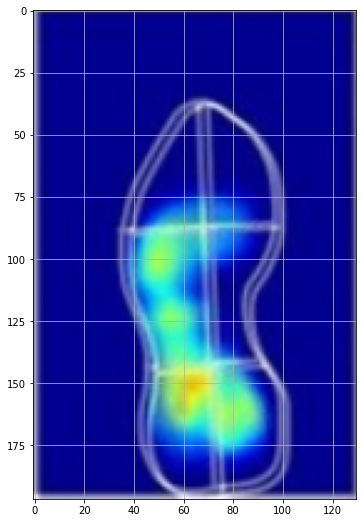

In [162]:
n=7
figure,ax = plt.subplots(1,1,figsize=(10,9))
ax.imshow(lists[0][n])
ax.grid("on")
plt.show()

In [164]:
### Experimental (Get rid of white contours) ###
A = lists[0][7]
R,G,B = (16,16,144)
Th = 100
M  = (A[:,:,0] > Th)*(A[:,:,1] > Th)*(A[:,:,2] > Th)*1 
M0 = -1*M + 1
F  = np.copy(A)
F[:,:,0],F[:,:,1],F[:,:,2] = A[:,:,0]*M0 + M*R  , A[:,:,1]*M0 + M*G,A[:,:,2]*M0 + M*B
#F[:,:,0],F[:,:,1],F[:,:,2] = A[:,:,0]*M0   , A[:,:,1]*M0 ,A[:,:,2]*M0 

In [169]:
def get_energy(segment):
    ''' Get the average energy of a segment'''
    N,M= segment.shape
    energy = 0
    for ni in range(0,N):
        for mj in range(0,M):
            energy += segment[ni,mj]
    
    energy = energy/(N*M)
    return round(energy)
    
def segment(COLOR_IMAGE, plot=True):
    ''' Segement the image into 6 segments, following the white contours'''
    rgb_weights = [0.2989, 0.5870, 0.1140]                     # Weights for Grayscale Transformation
    IMAGE = (np.dot(COLOR_IMAGE,rgb_weights)).astype(np.uint8) # Transfrom RGB to Grayscale 
    
    ## SEGMENT PHOTO ##
    TL =  IMAGE[40:80,40:60]   # TOP    LEFT 
    TR =  IMAGE[50:86,65:90]   # TOP    RIGHT 
    ML =  IMAGE [90:140,38:62] # MIDDLE lEFT
    MR =  IMAGE[90:140,70:85]  # MIDDLE RIGHT
    BL =  IMAGE[150:190,40:62] # BOTTOM LEFT
    BR =  IMAGE[150:190,70:94] # BOTTOM RIGHT
    
    ## GET ENERGY ##
    ETL = get_energy(TL) # TOP    LEFT  ENERGY
    ETR = get_energy(TR) # TOP    RIGHT ENERGY
    EML = get_energy(ML) # MIDDLE lEFT  ENERGY
    EMR = get_energy(MR) # MIDDLE RIGHT ENERGY
    EBL = get_energy(BL) # BOTTOM LEFT  ENERGY
    EBR = get_energy(BR) # BOTTOM RIGHT ENERGY
    
    
   
    if plot:
        figure, ax = plt.subplots(3,2,figsize=(6,10))
        ## Show segments ##
        ax[0,0].imshow(TL)
        ax[0,0].axis("off")
        ax[0,0].set_title(f"Energy {ETL}")
        ax[0,1].imshow(TR)
        ax[0,1].set_title(f"Energy {ETR}")
        ax[0,1].axis("off")
        ax[1,0].imshow(ML)
        ax[1,0].set_title(f"Energy {EML}")
        ax[1,0].axis("off")
        ax[1,1].imshow(MR)
        ax[1,1].set_title(f"Energy {EMR}")
        ax[1,1].axis("off")
        ax[2,0].imshow(BL)
        ax[2,0].set_title(f"Energy {EBL}")
        ax[2,0].axis("off")
        ax[2,1].imshow(BR)
        ax[2,1].set_title(f"Energy {EBR}")
        ax[2,1].axis("off")
       
        plt.show()
        
    return (ETL,ETR,EML,EMR,EBL,EBR)

def analyze_energy_through_time(Class,Th= 80):
    ETLv = list()
    ETRv = list()
    EMLv = list()
    EMRv = list()
    EBLv = list()
    EBRv = list()
    Vectors = [ETLv,ETRv,EMLv,EMRv,EBLv,EBRv]
    Labels =  ["Top Left","Top Right","Middle Left","Middle Right","Lower Right","Lower Left"]

    for i,image in enumerate(Class):
        Energy = segment(image, plot=False)
        for energy,vector in zip(Energy ,Vectors):
            vector.append(energy)

    figure, ax = plt.subplots(3,2,figsize=(12,10))
    axes = ax.flatten()
    i=0
    for vector,label in zip(Vectors,Labels):
        axes[i].plot(vector,label=label,)
        axes[i].hlines(Th,label="Threshold",xmin=0,xmax=10,linestyles='--',color="r")
        axes[i].set_xlabel("Time [s]")
        axes[i].set_ylabel("Energy")
        axes[i].set_title(f"{label} energy throug time")
        axes[i].legend(loc = "upper left")
        plt.tight_layout()
        i += 1
    
    return Vectors 


[[38.0, 37.0, 36.0, 37.0, 37.0, 39.0, 40.0, 42.0, 44.0, 54.0, 64.0],
 [30.0, 29.0, 28.0, 32.0, 36.0, 38.0, 40.0, 51.0, 64.0, 82.0, 102.0],
 [30.0, 31.0, 34.0, 85.0, 136.0, 144.0, 152.0, 151.0, 151.0, 156.0, 163.0],
 [43.0, 40.0, 36.0, 34.0, 31.0, 36.0, 41.0, 62.0, 84.0, 88.0, 92.0],
 [40.0, 54.0, 68.0, 105.0, 143.0, 127.0, 112.0, 90.0, 70.0, 67.0, 64.0],
 [26.0, 24.0, 23.0, 39.0, 56.0, 88.0, 120.0, 129.0, 138.0, 122.0, 107.0]]

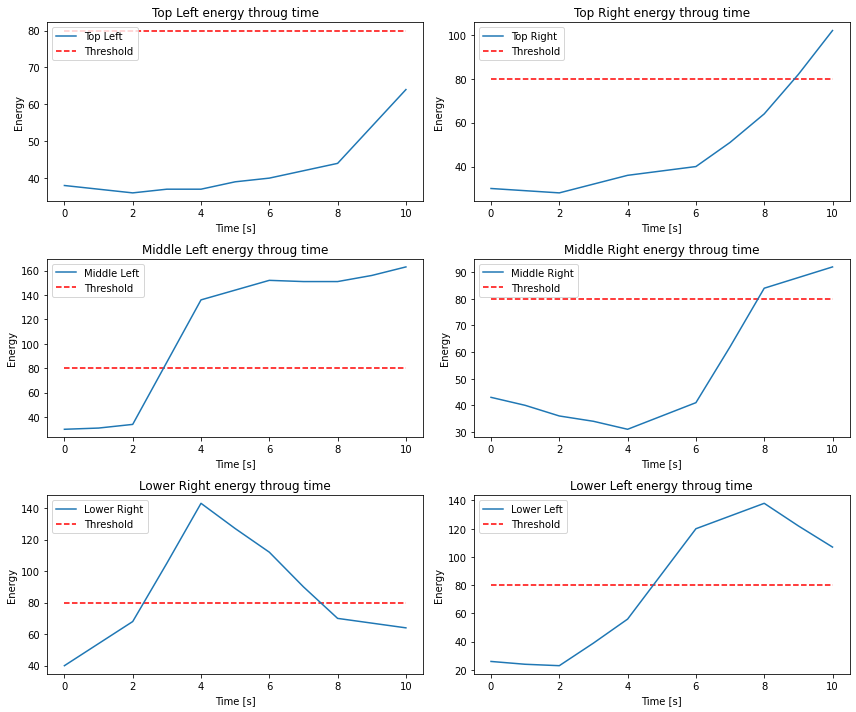

In [172]:
analyze_energy_through_time(TYPICAL,Th= 80)

Image number 0


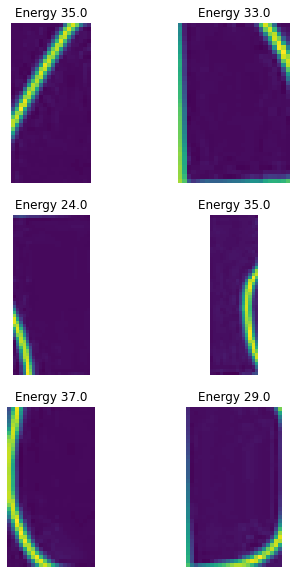

Image number 1


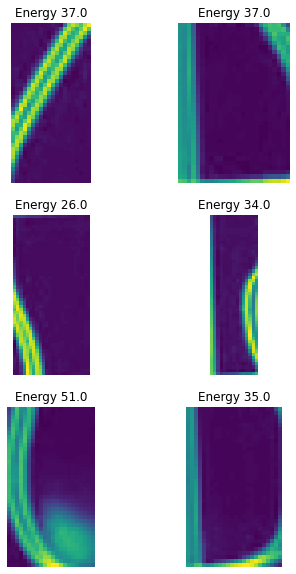

Image number 2


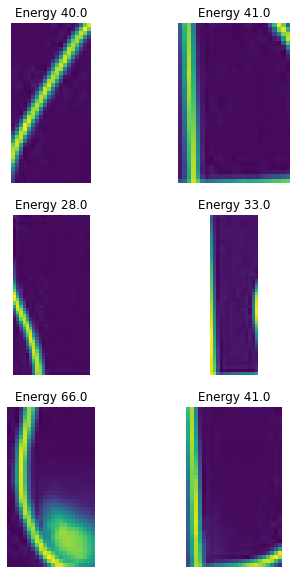

Image number 3


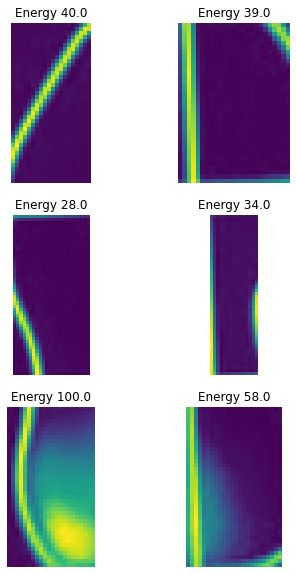

Image number 4


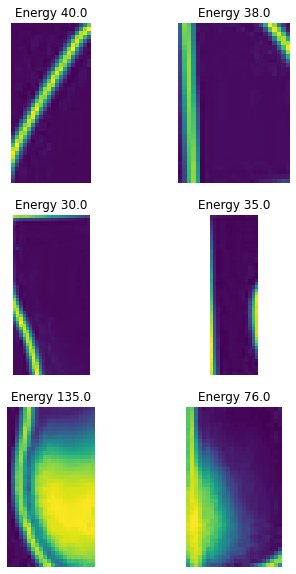

Image number 5


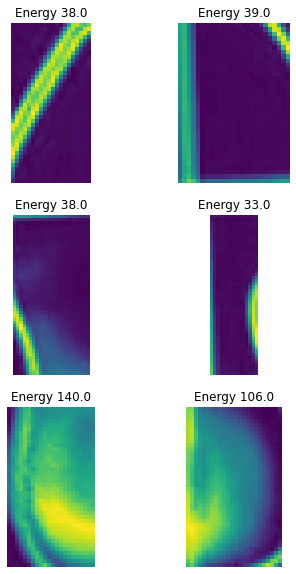

Image number 6


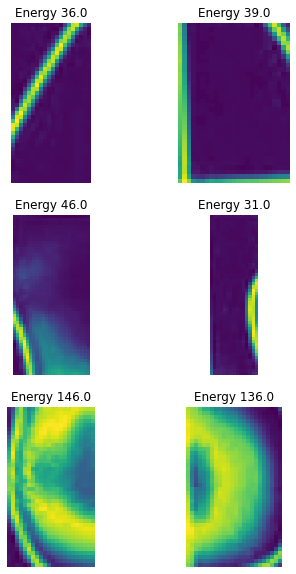

Image number 7


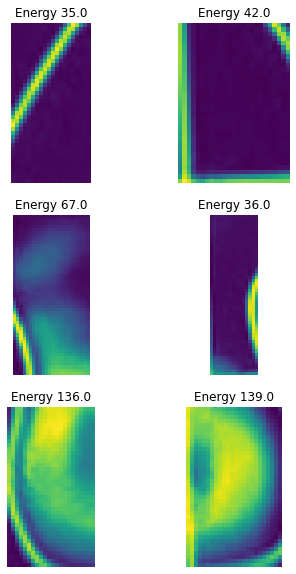

Image number 8


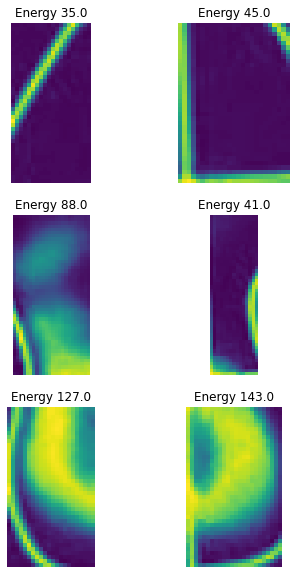

Image number 9


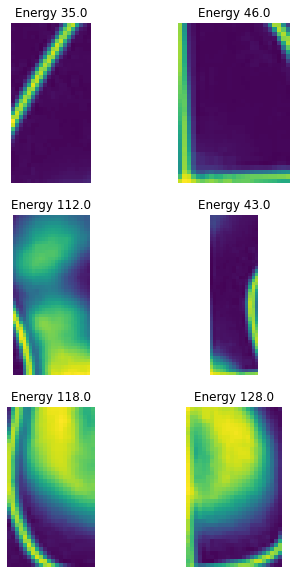

Image number 10


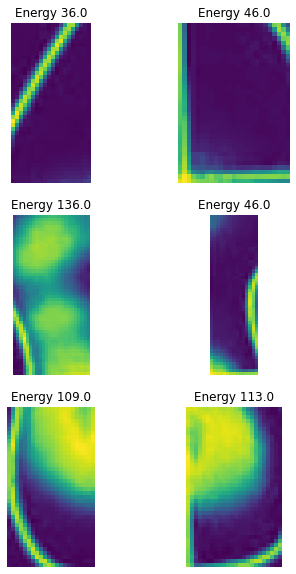

In [168]:
for i,image in enumerate(ATYPICAL):
    print(f"Image number {i}")
    Energy = segment(image, plot=True)